In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import welch

Extraccion del dataset y posterior conversión a dataframe usando la libreria Pandas

In [2]:
df_hechos = pd.read_csv(r"C:\Users\saulz\OneDrive\Documents\Programacion\Henry\Proyecto Individual2\Dataset\homicidios.xlsx - HECHOS.csv", sep=',', encoding='UTF-8')
df_hechos

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,1/1/2016,2016,1,1,4:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,1/2/2016,2016,1,2,1:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,1/3/2016,2016,1,3,7:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,1/10/2016,2016,1,10,0:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,1/21/2016,2016,1,21,5:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,12/13/2021,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,NaN,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,12/20/2021,2021,12,20,1:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,12/30/2021,2021,12,30,0:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,NaN,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,12/15/2021,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,4071.0,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


In [3]:
df_victimas = pd.read_csv(r"C:\\Users\saulz\\OneDrive\\Documents\\Programacion\\Henry\\Proyecto Individual2\Dataset\\homicidios.xlsx - VICTIMAS.csv")
df_victimas

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1/1/2016,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,1/1/2016
1,2016-0002,1/2/2016,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,1/2/2016
2,2016-0003,1/3/2016,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,1/3/2016
3,2016-0004,1/10/2016,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,1/21/2016,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2/1/2016
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,12/12/2021,2021,12,12,PEATON,PEATON,FEMENINO,50,12/12/2021
713,2021-0093,12/13/2021,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,12/18/2021
714,2021-0094,12/20/2021,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,12/20/2021
715,2021-0095,12/30/2021,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,1/2/2022


Realizamos una visualización general para ambos dataframes con el método .info() para obesarvar los tipos de datos que tenemos en cada columna, cantidad de columnas, entre otros elementos y con esto tener una idea más clara de los datos con los que trabajaremos.

In [4]:
df_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     696 non-null    object 
 1   N_VICTIMAS             696 non-null    int64  
 2   FECHA                  696 non-null    object 
 3   AAAA                   696 non-null    int64  
 4   MM                     696 non-null    int64  
 5   DD                     696 non-null    int64  
 6   HORA                   696 non-null    object 
 7   HH                     696 non-null    object 
 8   LUGAR_DEL_HECHO        696 non-null    object 
 9   TIPO_DE_CALLE          696 non-null    object 
 10  Calle                  695 non-null    object 
 11  Altura                 129 non-null    float64
 12  Cruce                  525 non-null    object 
 13  Dirección Normalizada  688 non-null    object 
 14  COMUNA                 696 non-null    int64  
 15  XY (CA

In [5]:
df_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID_hecho             717 non-null    object
 1   FECHA                717 non-null    object
 2   AAAA                 717 non-null    int64 
 3   MM                   717 non-null    int64 
 4   DD                   717 non-null    int64 
 5   ROL                  717 non-null    object
 6   VICTIMA              717 non-null    object
 7   SEXO                 717 non-null    object
 8   EDAD                 717 non-null    object
 9   FECHA_FALLECIMIENTO  717 non-null    object
dtypes: int64(3), object(7)
memory usage: 56.1+ KB


Al usar el método .describe() podemos obtener datos relevantes como lo son la menia, el minimo, entre otros, esto con la finalidad de tener un mejor panorama y conocimiento de nuestro dataframe

In [6]:
df_hechos.describe()

,N_VICTIMAS,AAAA,MM,DD,Altura,COMUNA
count,696.000000,696.000000,696.000000,696.000000,129.000000,696.000000
mean,1.030172,2018.188218,6.692529,15.936782,3336.635659,7.425287
std,0.179393,1.683754,3.571309,8.639646,3060.641793,4.387050
min,1.000000,2016.000000,1.000000,1.000000,30.000000,0.000000
25%,1.000000,2017.000000,4.000000,9.000000,1359.000000,4.000000
50%,1.000000,2018.000000,7.000000,16.000000,2551.000000,8.000000
75%,1.000000,2020.000000,10.000000,23.000000,4500.000000,11.000000
max,3.000000,2021.000000,12.000000,31.000000,16080.000000,15.000000


In [7]:
df_victimas.describe()

,AAAA,MM,DD
count,717.000000,717.000000,717.000000
mean,2018.174338,6.688982,15.960948
std,1.672655,3.575140,8.683358
min,2016.000000,1.000000,1.000000
25%,2017.000000,4.000000,9.000000
50%,2018.000000,7.000000,16.000000
75%,2019.000000,10.000000,23.000000
max,2021.000000,12.000000,31.000000


Chequeo de datos nulos.

Después de usar el método .info() aplicado al dataframe "df_hechos" y gracias a la columana de "Non-Null Count" podemos saber la cuenta por columa de cuantos valores no nulos contiene cada una. <br>
Teniendo en cuenta que el total de los registros por columana es de 696, podemos observar la gran cantidad de nulos que existen en las columnas "Altura" y "Cruce". <br>
Por lo tanto haremos un chequeo de esos datos nulos.

In [8]:
hechos_nulos = df_hechos[df_hechos['Altura'].isnull()]

hechos_nulos = df_hechos[df_hechos['Calle'].isnull()]

hechos_nulos = df_hechos[df_hechos['Cruce'].isnull()]
hechos_nulos

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
2,2016-0003,1,1/3/2016,2016,1,3,7:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
9,2016-0013,1,2/10/2016,2016,2,10,11:30:00,11,AV ENTRE RIOS 1366,AVENIDA,...,1366.0,NaN,ENTRE RIOS AV. 1366,1,Point (106616.41069662 100496.44662323),-58.39114932,-34.62477387,PEATON-AUTO,PEATON,AUTO
14,2016-0020,1,2/17/2016,2016,2,17,16:00:00,16,SUIPACHA 156,CALLE,...,156.0,NaN,SUIPACHA 156,1,Point (107684.31807562 102519.17333314),-58.37952223,-34.60653282,PEATON-AUTO,PEATON,AUTO
33,2016-0047,1,4/15/2016,2016,4,15,5:30:00,5,LIMA 1483,CALLE,...,1483.0,NaN,LIMA 1483,1,Point (107412.19098904 100391.02557777),-58.38247061,-34.62571878,PEATON-PASAJEROS,PEATON,PASAJEROS
35,2016-0049,1,4/17/2016,2016,4,17,0:00:00,0,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,AUTOPISTA,...,NaN,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),-58.37714647568196,-34.63657525428238,SD-SD,SD,SD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,2021-0082,1,11/6/2021,2021,11,6,4:39:00,4,AU 25 DE MAYO KM7 (ALTURA PASCO),AUTOPISTA,...,NaN,NaN,AUTOPISTA 25 DE MAYO y PASCO,3,Point (106179.07517962 100523.29161457),-58.39591856,-34.62453459,MOTO-AUTO,MOTO,AUTO
685,2021-0087,1,11/27/2021,2021,11,27,11:22:00,11,ESMERALDA 1359,CALLE,...,1359.0,NaN,ESMERALDA 1359,1,Point (107829.16426745 104166.84427133),-58.37795815,-34.59167894,PEATON-BICICLETA,PEATON,BICICLETA
687,2021-0089,1,12/2/2021,2021,12,2,1:10:00,1,AV. GAONA 3655,AVENIDA,...,3655.0,NaN,GAONA AV. 3655,11,Point (98804.41713890 100872.30706871),-58.47633683,-34.62140594,MOTO-AUTO,MOTO,AUTO
694,2021-0096,1,12/15/2021,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,4071.0,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


Analizando detenidamente los datos nulos y sus respectivas columnas, se llegó a la siguiente conclusión: <br>
Debido a la cantidad de los datos nulos existentes y a que la información de las tres columnas anteriormente analizadas se puede encontrar en la columna "LUGAR_DEL_HECHO" Se tomó la decisión de eliminar las columnas "Altura", "Calle" y "Cruce".

En cuanto al dataframe "df_victimas" gracias al método .info() podemos observar que no hay ningún dato nulo.

In [9]:
df_victimas.head(2)

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1/1/2016,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,1/1/2016
1,2016-0002,1/2/2016,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,1/2/2016


Eliminación de columnas

Eliminación de columnas del dataframe "df_hechos" <br> <br>
Partimos por la eliminación de las columnas "Altura" y "Calle" por dos motivos, el primero es la alta presencia de datos nulos que tienen ambas columnas, en particular la columna "Altura" y el segundo motivo es que contamos con columnas como "LUGAR_DEL_HECHO" y "Dirección Normalizada". <br> <br>
Siguiendo con la misma lógica, procedemos a eliminar la columna "TIPO_DE_CALLE" ya que esa información la encontramos en la columna "Dirección Normalizada" <br><br>
Proseguimos a elimimar la columna y "DD" debido a que con las columnas "FECHA" "AAAA" y "DD" tenemos la información necesaria, además serán columnas más fáciles de usar al momento de graficar. <br><br>
Con la columna "HH" se realiza la eliminación bajo el mismo critero, debido a que encontramos la información en la columna "HORA". <br><br>

In [10]:
df_hechos.drop(['Altura','Calle','TIPO_DE_CALLE', 'Cruce', 'DD','HH'], axis=1, inplace=True)
df_hechos.head(2)

,ID,N_VICTIMAS,FECHA,AAAA,MM,HORA,LUGAR_DEL_HECHO,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,1/1/2016,2016,1,4:00:00,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,1/2/2016,2016,1,1:15:00,AV GRAL PAZ Y AV DE LOS CORRALES,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS


Cambio de nombres en las siguientes columnas del dataframe "df_hechos": <br>
"AAAA" y "MM" por "año" y "mes" respectivamente. <br>
"pos x" y "pos y", por "longitud" y "latitud" respectivamente . 

In [11]:
df_hechos = df_hechos.rename(columns={'AAAA' : 'año'})
df_hechos = df_hechos.rename(columns={'MM' : 'mes'})
df_hechos = df_hechos.rename(columns={'pos x' : 'longitud'})
df_hechos = df_hechos.rename(columns={'pos y' : 'latitud'})
df_hechos.head(2)

,ID,N_VICTIMAS,FECHA,año,mes,HORA,LUGAR_DEL_HECHO,Dirección Normalizada,COMUNA,XY (CABA),longitud,latitud,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,1/1/2016,2016,1,4:00:00,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,1/2/2016,2016,1,1:15:00,AV GRAL PAZ Y AV DE LOS CORRALES,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS


Eliminacion de columnas de df_victimas. <br><br>
Eliminamos la columna "DD" debido a que no es información relevante, además que contamos con la columna "FECHA" en donde tenemos la información necesaria, además las columnas "AAAA" y "DD" se usarán al momento de graficar.

In [12]:
df_victimas.drop(['DD'], axis=1, inplace=True)
df_victimas.head(1)

,ID_hecho,FECHA,AAAA,MM,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1/1/2016,2016,1,CONDUCTOR,MOTO,MASCULINO,19,1/1/2016


Normalización de valores 'SD' y datos nulos del dataframe 'df_hechos'.

Normalización de los valores 'SD' a 'sin dato', esto con la finalidad de que no haya ni un tipo de confusión a la hora de interpretar los datos. Para esto creamos una máscara con la finalidad de buscar los valores que coincidan con 'SD'. <br>
Se hará el mismo procedimiento a los datos nulos encontrados.

In [13]:
df_hechos[df_hechos['FECHA'] == 'SD']

,ID,N_VICTIMAS,FECHA,año,mes,HORA,LUGAR_DEL_HECHO,Dirección Normalizada,COMUNA,XY (CABA),longitud,latitud,PARTICIPANTES,VICTIMA,ACUSADO


Conteo de valores 'SD' en las siguientes columnas y la cantidad de los mismos: <br>
'HORA' = 1 registro. <br>
'LUGAR_DEL_HECHO' = 1 registro. <br>
'VICTIMA' = 9 registros. <br>
'ACUSADO' = 23 registros.

Las columnas 'longitud' y 'latitud' representan sus valores 'sin dato' con '.' . <br>
'longitud' = 12 registros. <br>
'latitud' = 12 registros. 

Sustitución de valores.

In [14]:
df_hechos['FECHA'] = df_hechos['HORA'].replace('SD', '0')

df_hechos['HORA'] = df_hechos['HORA'].replace('SD', 'sin dato')

df_hechos['LUGAR_DEL_HECHO'] = df_hechos['LUGAR_DEL_HECHO'].replace('SD', 'sin dato')

df_hechos['VICTIMA'] = df_hechos['VICTIMA'].replace('SD', 'sin dato')

df_hechos['ACUSADO'] = df_hechos['ACUSADO'].replace('SD', 'sin dato')

Se hace la aclaración en la sustitución de valores en la columna "FECHA" debido a que se pondrá el valor '0' para la representación de los valores 'sin dato', esto para aclarar que no se debe de considerar un outlier ni tampoco un error. <br>
Esto con la finalidad de poder tener una mayor facilidad en el momento de aplicar las graficas necesarias.

In [15]:
df_hechos['latitud'] = df_hechos['latitud'].replace('.', 'sin dato')

df_hechos['longitud'] = df_hechos['longitud'].replace('.', 'sin dato')

In [16]:
df_hechos['Dirección Normalizada']  = df_hechos['Dirección Normalizada'].fillna('sin dato')  

Verificación y tratamiento de datos duplicados del df  'df_hechos'.

In [17]:
duplicados= df_hechos[df_hechos.duplicated(subset='ID')]
duplicados

,ID,N_VICTIMAS,FECHA,año,mes,HORA,LUGAR_DEL_HECHO,Dirección Normalizada,COMUNA,XY (CABA),longitud,latitud,PARTICIPANTES,VICTIMA,ACUSADO


Cambio de nombre en las siguientes columnas del dataframe “df_victimas”: <br>
"AAAA" y "MM" por "año" y "mes" respectivamente. <br>

In [18]:
df_victimas = df_victimas.rename(columns={'AAAA' : 'año'})
df_victimas = df_victimas.rename(columns={'MM' : 'mes'})
df_victimas.head(1)

,ID_hecho,FECHA,año,mes,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1/1/2016,2016,1,CONDUCTOR,MOTO,MASCULINO,19,1/1/2016


Normalización de valores 'SD' y datos nulos del dataframe 'df_victimas'.

Normalización de los valores 'SD' a 'sin dato', esto con la finalidad de que no haya ni un tipo de confusión a la hora de interpretar los datos. Para esto creamos una máscara con la finalidad de buscar los valores que coincidan con 'SD'. <br>
Se hará el mismo procedimiento a los datos nulos encontrados.

In [19]:
df_victimas[df_victimas['FECHA_FALLECIMIENTO'] == 'SD']

,ID_hecho,FECHA,año,mes,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
3,2016-0004,1/10/2016,2016,1,CONDUCTOR,MOTO,MASCULINO,18,SD
16,2016-0022,2/21/2016,2016,2,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,41,SD
19,2016-0027,2/28/2016,2016,2,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,34,SD
22,2016-0031,3/8/2016,2016,3,CONDUCTOR,MOTO,MASCULINO,21,SD
33,2016-0045,4/11/2016,2016,4,CONDUCTOR,MOTO,MASCULINO,SD,SD
...,...,...,...,...,...,...,...,...,...
221,2017-0089,7/13/2017,2017,7,SD,SD,MASCULINO,23,SD
242,2017-0112,9/10/2017,2017,9,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,1,SD
246,2017-0115,9/19/2017,2017,9,CONDUCTOR,MOTO,MASCULINO,34,SD
253,2017-0126,10/14/2017,2017,10,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,39,SD


Conteo de valores 'SD' en las siguientes columnas y la cantidad de los mismos: <br>
'ROL' = 11 registros. <br>
'VICTIMA' = 9 registros. <br>
'SEXO' = 6 registros. <br>
'EDAD' = 59 registros.<BR>
'FECHA_FALLECIMIENTO' = 68 registros.

In [20]:
df_victimas['ROL'] = df_victimas['ROL'].replace('SD', 'sin dato')

df_victimas['VICTIMA'] = df_victimas['VICTIMA'].replace('SD', 'sin dato')

df_victimas['SEXO'] = df_victimas['SEXO'].replace('SD', 'sin dato')

df_victimas['EDAD'] = df_victimas['EDAD'].replace('SD', '0')

df_victimas['FECHA_FALLECIMIENTO'] = df_victimas['FECHA_FALLECIMIENTO'].replace('SD', 'sin dato')

Se hace la aclaración en la sustitución de valores en la columna 'edad' debido a que se pondrá el valor '0' para la representación de los valores 'sin dato', esto para aclarar que no se debe de considerar un outlier ni tampoco un error. <br>
Esto con la finalidad de poder tener una mayor facilidad en el momento de aplicar las graficas necesarias.

Verificación y tratamiento de datos duplicados del df  'df_hechos'.

In [21]:
duplicados= df_victimas[df_victimas.duplicated(subset='ID_hecho')] 
duplicados

,ID_hecho,FECHA,año,mes,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
30,2016-0041,3/29/2016,2016,3,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,0,3/30/2016
99,2016-0126,9/18/2016,2016,9,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,60,sin dato
164,2017-0026,2/26/2017,2017,2,CONDUCTOR,AUTO,MASCULINO,19,2/26/2017
174,2017-0035,3/23/2017,2017,3,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,32,3/23/2017
175,2017-0035,3/23/2017,2017,3,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,30,3/23/2017
177,2017-0036,3/29/2017,2017,3,CONDUCTOR,MOTO,MASCULINO,20,3/29/2017
187,2017-0050,4/28/2017,2017,4,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,16,4/28/2017
238,2017-0108,9/2/2017,2017,9,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,10,9/2/2017
243,2017-0112,9/10/2017,2017,9,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,0,9/13/2017
254,2017-0126,10/14/2017,2017,10,CONDUCTOR,AUTO,MASCULINO,36,10/14/2017


In [22]:
df_victimas[df_victimas['ID_hecho'] == '2017-0035']

,ID_hecho,FECHA,año,mes,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
173,2017-0035,3/23/2017,2017,3,CONDUCTOR,AUTO,MASCULINO,28,3/23/2017
174,2017-0035,3/23/2017,2017,3,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,32,3/23/2017
175,2017-0035,3/23/2017,2017,3,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,30,3/23/2017


Después de la verificación de los registros, se llegó a la conclusión de que los registros que aparecen con un 'id_hecho' duplicado, se debe a que en ese accidente habían dos o más personas que acompañaban a la victima.

Se convierten en minúsculas todos las columnas del dataframe 'df_hechos' y 'df_victimas'

In [23]:
df_hechos.columns = df_hechos.columns.str.lower()
df_hechos.head(1)

,id,n_victimas,fecha,año,mes,hora,lugar_del_hecho,dirección normalizada,comuna,xy (caba),longitud,latitud,participantes,victima,acusado
0,2016-0001,1,4:00:00,2016,1,4:00:00,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO


In [24]:
df_victimas.columns = df_victimas.columns.str.lower()
df_victimas.head(1)

,id_hecho,fecha,año,mes,rol,victima,sexo,edad,fecha_fallecimiento
0,2016-0001,1/1/2016,2016,1,CONDUCTOR,MOTO,MASCULINO,19,1/1/2016


Se le cambia el tipo de datos a la columna “edad” para poder usarla en las graficas necesarias.

In [25]:
df_victimas['edad'] = df_victimas['edad'].astype(int)

Outliers

Empezamos a realizar el chequeo de outliers tomando en cuenta diferentes columnas de nuestro dataframe 'df_hechos' y el uso de diversas gráficas para verificar estos outliers.

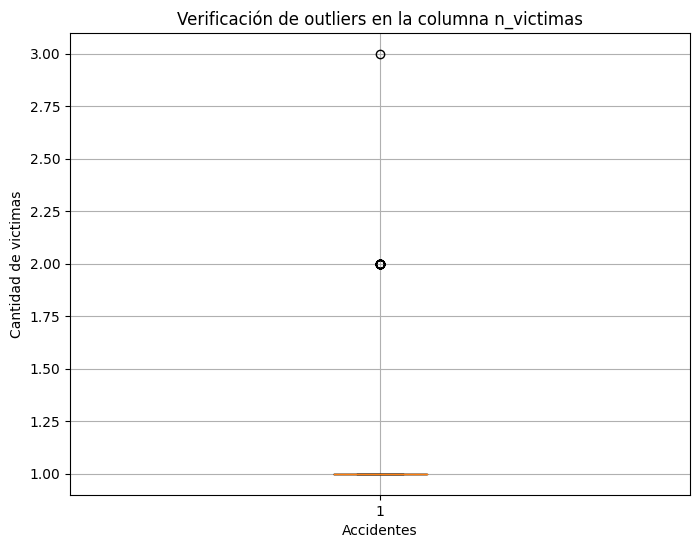

In [26]:
plt.figure(figsize=(8,6))
plt.boxplot(df_hechos['n_victimas'])
plt.title('Verificación de outliers en la columna n_victimas')
plt.xlabel('Accidentes')
plt.ylabel('Cantidad de victimas')
plt.grid(True)
plt.show()

Después de analizar el gráfico de boxplot referente al número de víctimas, notamos que el grueso de la muestra es igual a 1 y podemos observar 2 outliers referentes a los valores 2 y 3. Con esta información concluimos que los outliers anteriores no son errores sino valores atípicos.

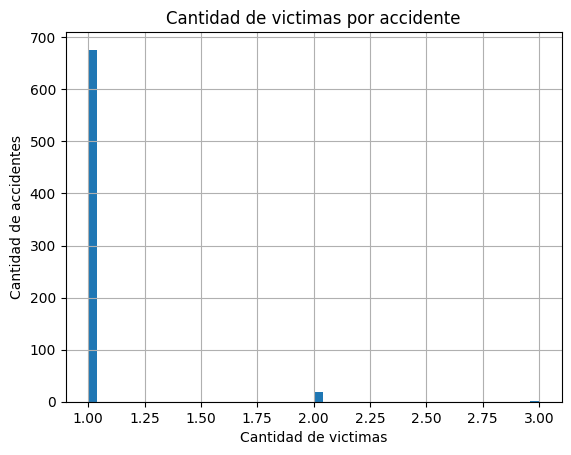

In [27]:
df_hechos['n_victimas'].hist(bins=50)
plt.title('Cantidad de victimas por accidente')
plt.xlabel('Cantidad de victimas')
plt.ylabel('Cantidad de accidentes')
plt.show()

Se realiza este gráfico para poder tener un mejor contexto y reforzar lo encontrado en el gráfico boxplot.

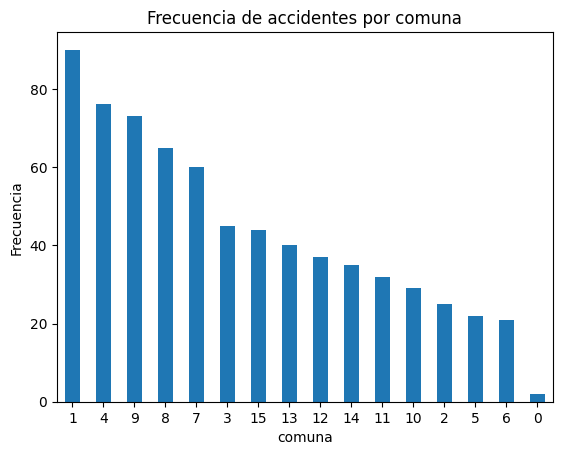

In [28]:
df_hechos['comuna'].value_counts().plot(kind='bar')
plt.title('Frecuencia de accidentes por comuna')
plt.xlabel('comuna')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0) 
plt.show()

Gracias a la grafica anterior podemos inferir en dos hechos importantes. El primero es que la comuna 1, es el primer lugar en donde ocurren más accidentes, con más de 80 accidentes registrados. <br>
El segundo punto a destacar es el outlier de la comuna numero 0, debido a esto podemos concluir que este outlier se trata de un error, ya que no existe ninguna comuna 0. 

Continuamos con el chequeo de outliers, pero ahora con el dataframe 'df_victimas, en el cual se hará el mismo proceso que con el dataframe de ‘df_hechos’.

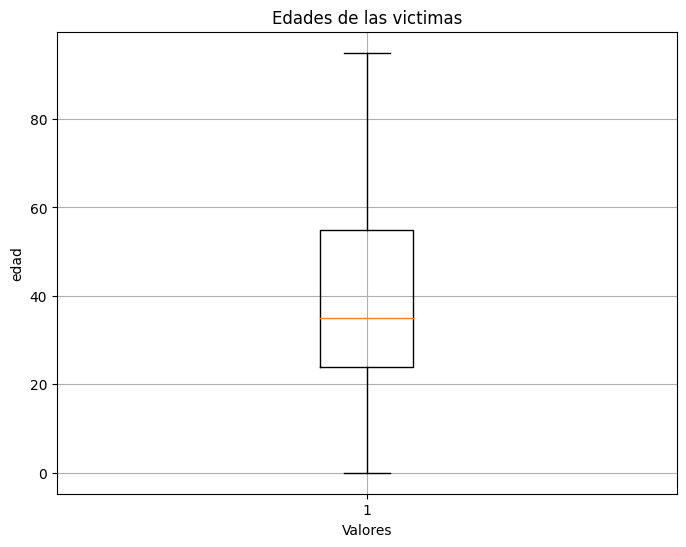

In [29]:
plt.figure(figsize=(8,6))
plt.boxplot(df_victimas['edad'])
plt.title('Edades de las victimas')
plt.xlabel('Valores')
plt.ylabel('edad')
plt.grid(True)
plt.show()

In [30]:
df_victimas[df_victimas['edad'] > 90]

,id_hecho,fecha,año,mes,rol,victima,sexo,edad,fecha_fallecimiento
213,2017-0080,6/22/2017,2017,6,PEATON,PEATON,FEMENINO,95,6/22/2017
524,2019-0089,10/23/2019,2019,10,PEATON,PEATON,FEMENINO,92,10/23/2019
566,2020-0028,5/19/2020,2020,5,PEATON,PEATON,MASCULINO,91,5/23/2020
594,2020-0055,11/19/2020,2020,11,PEATON,PEATON,MASCULINO,91,12/11/2020


Gracias al grafico anterior podemos observar el rango de edades en la búsqueda de outliers, en el cual vemos los dos extremos. Analizando el extremo superior y confirmando con el uso de una máscara podemos ver que la edad más grande es de 95 años, por lo que podemos concluir que se trata de un valor atípico y no de un error. Por su parte, en el rango inferior podemos encontrar a victimas en los rangos de 1, 4, 5 y 7 años, lo cual tampoco se considera un error, sino solamente valores atípicos. <br><br>
Haciendo la aclaración de todos aquellos valores iguales a 0 en la columna “edad”, no son un error, sino son los valores que se decidieron poner para representar aquellos registros que no tenían datos y contaban con las siglas “SD”.


Exploración de datos por medio de graficas.

Visualización de variables del  dataframe “df_hechos” .

hisotorico de accidentes por año 

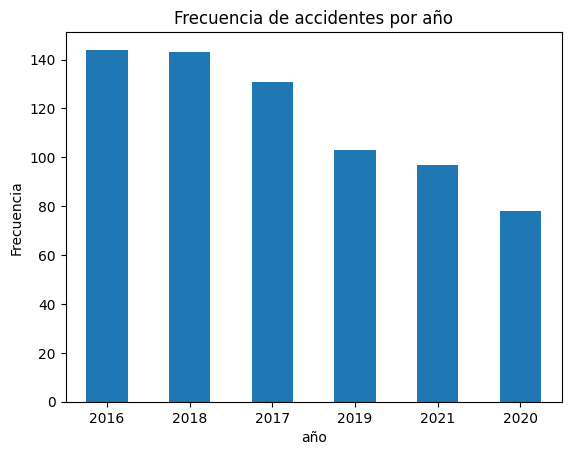

In [33]:
df_hechos['año'].value_counts().plot(kind='bar')
plt.title('Frecuencia de accidentes por año')
plt.xlabel('año')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0) 
plt.show()


Después de analizar este grafico podemos decir que el número de accidentes ha variado año con año y no ha sido una reducción gradual, sin embargo, si podemos ver un descenso el número de accidentes si comparamos el año más antiguo (2016) con el año más reciente (2021), aunque este último no ha sido el año con menor número de accidentes entre todos los años analizados. Otro factor para tomar en cuenta es que la reducción en el año 2020, recordemos que ese año se dio la pandemia por COVID-19, así que podríamos sugerir que ese descenso en el numero de accidentes se debe a la pandemia.

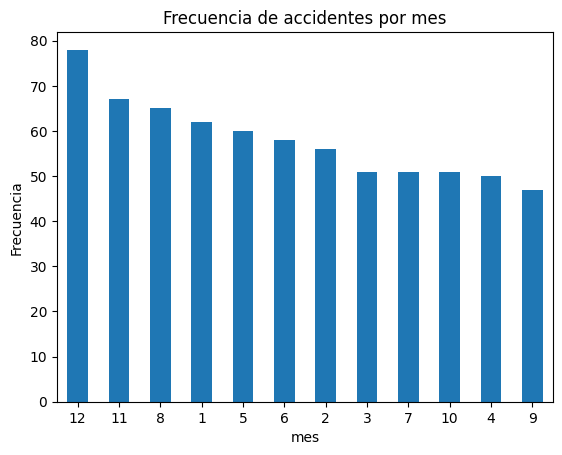

In [31]:
df_hechos['mes'].value_counts().plot(kind='bar')
plt.title('Frecuencia de accidentes por mes')
plt.xlabel('mes')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0) 
plt.show()

Con el anterior grafico de barras podemos observar que los meses con mayor numero de incidentes, son los meses de diciembre, noviembre y agosto. Esto coincide con fechas de vacaciones y celebraciones, debido a esto se recomienda realizar mayores campañas de prevención en estos meses.

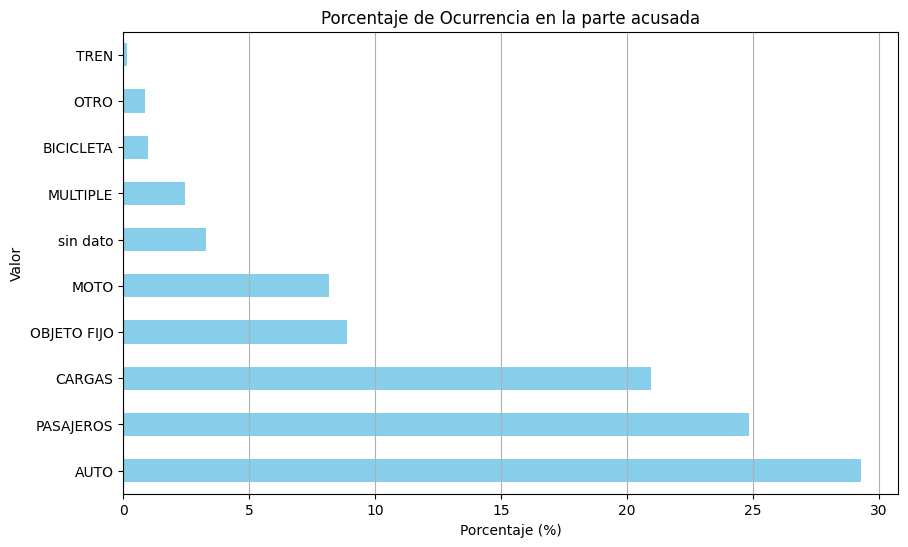

In [32]:
value_counts = df_hechos['acusado'].value_counts()
percentages = (value_counts / len(df_hechos)) * 100
plt.figure(figsize=(10, 6))
percentages.plot(kind='barh', color='skyblue')
plt.xlabel('Porcentaje (%)')
plt.ylabel('Valor')
plt.title('Porcentaje de Ocurrencia en la parte acusada')
plt.grid(axis='x')  
plt.show()

Gracias a esta grafica, podemos observar que los autos son el principal medio de transporte que ocasiona los accidentes, teniendo esto en cuenta podemos recomendar que aquellas personas que vayan a tramitar una licencia de conducir para un vehículo (auto), se realicen pruebas más exhaustivas al igual que charlas para crear una conciencia vial, esto último también se recomienda aplicar en forma de publicidad en los transportes públicos para reducir la segunda causa con mayor recurrencia que son los pasajeros.

comuna respecto a numero de victimas

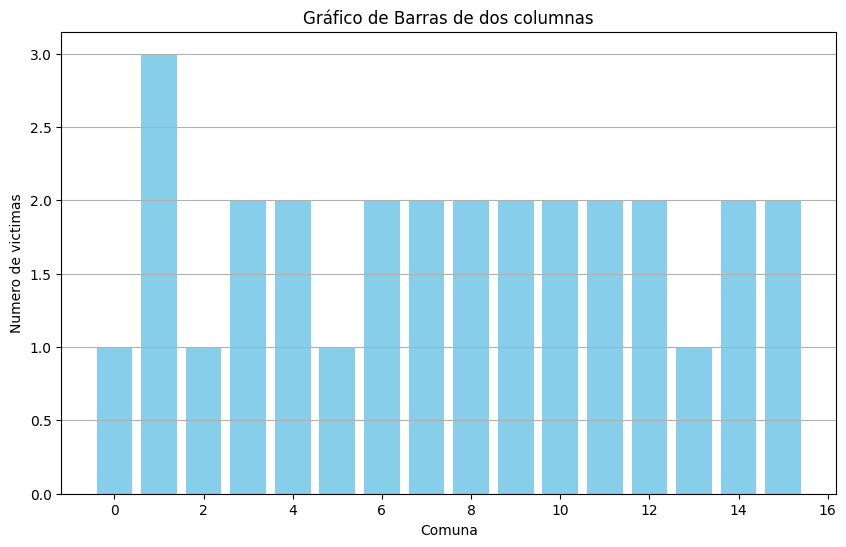

In [34]:
plt.figure(figsize=(10, 6))
plt.bar(df_hechos['comuna'], df_hechos['n_victimas'], color='skyblue')

plt.xlabel('Comuna')
plt.ylabel('Numero de victimas')
plt.title('Gráfico de Barras de dos columnas')

plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Visualización de variables del  dataframe “df_victimas” .

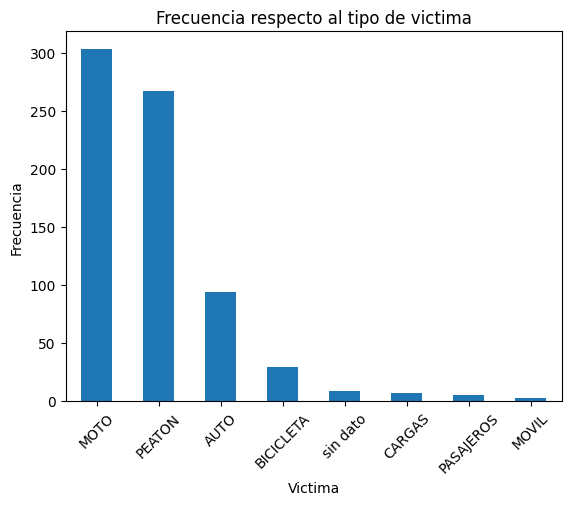

In [35]:
df_victimas['victima'].value_counts().plot(kind='bar')
plt.title('Frecuencia respecto al tipo de victima')
plt.xlabel('Victima')
plt.ylabel('Frecuencia')
plt.xticks(rotation= 45)
plt.show()

Analizando esta grafica podemos inferior en que el mayor numero de victimas que resultan de accidentes son las motos y los peatones, debido a esto recomendamos las siguientes medidas. En cuanto a las motos recomendamos el uso obligatorio de equipo de seguridad para disminuir el número de víctimas. En cuanto al peatón sugerimos realizar un chequeo en las diversas comunas para corroborar si el peatón cuenta con infraestructura (pasos peatonales, puentes de cruce, entre otros) para proteger su integridad.

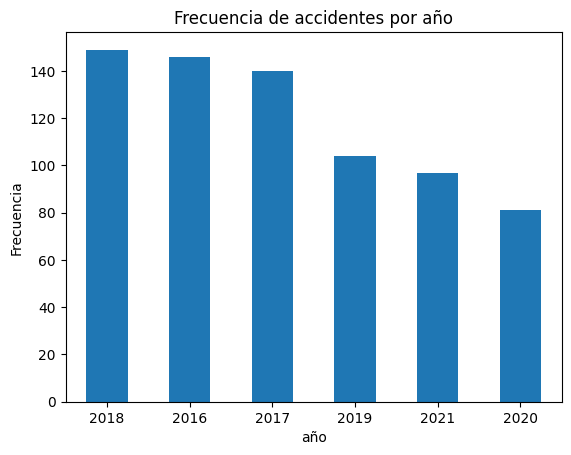

In [36]:
df_victimas['año'].value_counts().plot(kind='bar')
plt.title('Frecuencia de accidentes por año')
plt.xlabel('año')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0) 
plt.show()

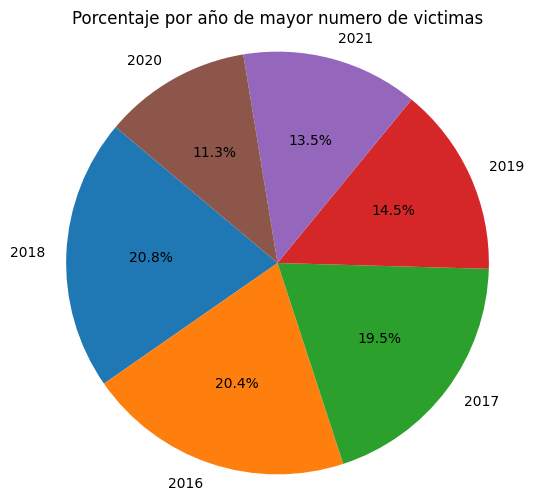

In [37]:
frecuencia_años = df_victimas['año'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(frecuencia_años, labels=frecuencia_años.index, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje por año de mayor numero de victimas')
plt.axis('equal') 
plt.show()

Con esta grafica podemos concluir que el mayor porcentaje de victimas se lo lleva el año 2018 con un 20.8%, muy cerca se encuentra el año 2016 con 20.4%. Lo que podemos llegar a observar es que el año 2021 solo cuenta con un 13.5%, eso es una reducción del 7.3% comparado con el año 2018.

In [38]:
df_victimas['edad'] = df_victimas['edad'].astype(int) 

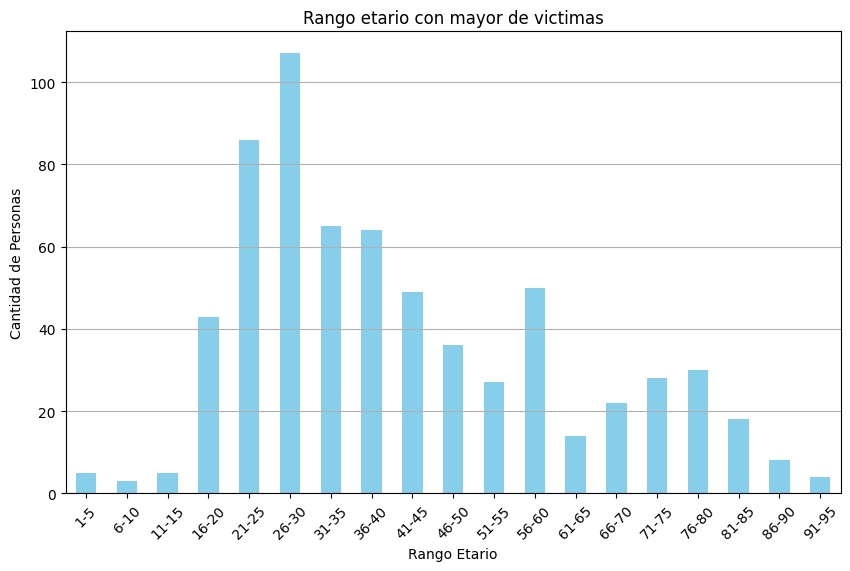

In [39]:
bins = list(range(1, 100, 5))
labels = [f"{i}-{i+4}" for i in range(1, 96, 5)]
df_victimas['rango_etario'] = pd.cut(df_victimas['edad'], bins=bins, labels=labels, right=False)
conteo_rangos = df_victimas['rango_etario'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
conteo_rangos.plot(kind='bar', color='skyblue')
plt.xlabel('Rango Etario')
plt.ylabel('Cantidad de Personas')
plt.title('Rango etario con mayor de victimas')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Una vez analizado los datos que nos proporciona esta grafica, podemos decir que las personas que se encuentran en los rangos de edad entre 21 y 30 años, son las que tienen el mayor numero de incidencias siendo victimas en incidentes viales.

KPI

1. Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior. <br>

In [40]:
df_victimas['fecha'] = pd.to_datetime(df_victimas['fecha'])

df_victimas['semestre'] = df_victimas['fecha'].dt.year.astype(str) + '-' + (df_victimas['fecha'].dt.month // 6 + 1).astype(str)


Periodo de este (último) semestre, inicio: |2021-06-30 00:00:00|, hasta |2021-12-30 00:00:00|
Periodo del semestre anterior al último, inicio: |2020-12-29 00:00:00|, hasta |2021-06-29 00:00:00| 

Número de accidentes en el último semestre: 42
Número de accidentes en el semestre anterior: 55 

Tasa de homicidios por cada 100 mil habitantes en el último semestre: 1.3454
Tasa de homicidios por cada 100 mil habitantes en el semestre anterior: 1.7619 

Cambio porcentual entre el último semestre en comparación con el semestre anterior: -23.64%


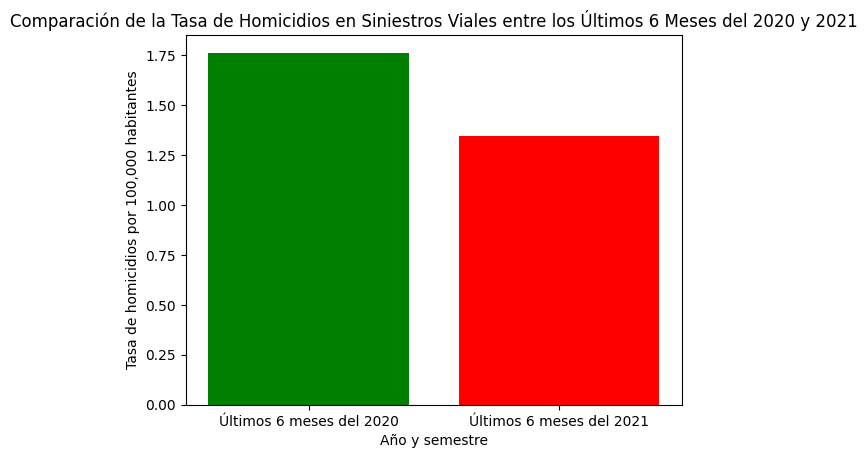

In [56]:

poblacion = 3121707

# Convertimos a datetime la columna "FECHA"
df_victimas["fecha"] = pd.to_datetime(df_victimas["fecha"], format='%d/%m/%Y')

# Obtenemos en una variable la fecha más reciente:
ultima_fecha = df_victimas["fecha"].max()

# Ahora buscaremos obtener nuestro 'semestre más reciente' y compararlo con el semestre anterior
# Guardamos en una nueva varible el fin de este semestre y su inicio:
fin_de_semestre = ultima_fecha
inicio_de_semestre = fin_de_semestre - pd.DateOffset(months=6)

# Ahora buscaremos el inicio y fin del semestre anterior:
fin_de_semestre_anterior = inicio_de_semestre - pd.DateOffset(days=1)
inicio_de_semestre_anterior = fin_de_semestre_anterior - pd.DateOffset(months=6)

# Ahora buscamos los accidentes por semestre:
accidentes_semestre = df_victimas[(df_victimas['fecha'] >= inicio_de_semestre) & (df_victimas['fecha'] <= fin_de_semestre)]
accidentes_semestre_anterior = df_victimas[(df_victimas['fecha'] >= inicio_de_semestre_anterior) & (df_victimas['fecha'] <= fin_de_semestre_anterior)]

# Obtenemos el número de accidentes por semestre:
num_accidentes_semestre = len(accidentes_semestre)
num_accidentes_semestre_anterior = len(accidentes_semestre_anterior)

# Definimos la tasa de homicidios para cada semestre:
tasa_semestre = (num_accidentes_semestre / poblacion) * 100000
tasa_semestre_anterior = (num_accidentes_semestre_anterior / poblacion) * 100000

# Definimos el cambio porcentual entre semestres: 
# ((Tasa del último semestre − Tasa del semestre anterior) / Tasa del semestre anterior) * 100
diferencia_porcentual_semestres = ((tasa_semestre - tasa_semestre_anterior) / tasa_semestre_anterior) * 100

# Imprimimos nuestros hallazgos:
print(f"Periodo de este (último) semestre, inicio: |{inicio_de_semestre}|, hasta |{fin_de_semestre}|")
print(f"Periodo del semestre anterior al último, inicio: |{inicio_de_semestre_anterior}|, hasta |{fin_de_semestre_anterior}| \n")
print(f"Número de accidentes en el último semestre: {num_accidentes_semestre}")
print(f"Número de accidentes en el semestre anterior: {num_accidentes_semestre_anterior} \n")
print(f"Tasa de homicidios por cada 100 mil habitantes en el último semestre: {round(tasa_semestre, 4)}")
print(f"Tasa de homicidios por cada 100 mil habitantes en el semestre anterior: {round(tasa_semestre_anterior, 4)} \n")
print(f"Cambio porcentual entre el último semestre en comparación con el semestre anterior: {round(diferencia_porcentual_semestres, 2)}%")
plt.bar(['Últimos 6 meses del 2020', 'Últimos 6 meses del 2021'], [tasa_semestre_anterior, tasa_semestre], color=['green', 'red'])
plt.xlabel('Año y semestre')
plt.ylabel('Tasa de homicidios por 100,000 habitantes')
plt.title('Comparación de la Tasa de Homicidios en Siniestros Viales entre los Últimos 6 Meses del 2020 y 2021')
plt.xticks(rotation=0)
plt.show()

Analizando la grafica y el primer KPI en el cual se busca reducir la tasa de homicidios en siniestros viales en los últimos 6 meses comparados con el mismo semestre del año anterior, podemos concluir que este KPI se consiguió realizar de manera exitosa debido a que en los últimos 6 meses la tasa de homicidios fue de 1.345% comparada con la tasa del semestre anterior, la cual fue de 1.7619, con estos datos podemos calcular que hubo una reducción en la tasa de homicidios de un -23.64%

In [54]:
df_victimas[(df_victimas['año'] == 2020) & (df_victimas['mes'] >=7) ].count()

id_hecho               50
fecha                  50
año                    50
mes                    50
rol                    50
victima                50
sexo                   50
edad                   50
fecha_fallecimiento    50
rango_etario           48
semestre               50
dtype: int64

In [43]:
df_victimas[(df_victimas['año'] == 2021) & (df_victimas['mes'] >=7) ].count()

id_hecho               42
fecha                  42
año                    42
mes                    42
rol                    42
victima                42
sexo                   42
edad                   42
fecha_fallecimiento    42
rango_etario           41
semestre               42
dtype: int64

2. Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior. <br>

El total de accidentes en moto en el año anterior fue de:  29
El total de accidentes en moto en el año actual fue de:  46
El porcentaje de accidentes del presente año respecto al año anterior es de: 58.620689655172406 %


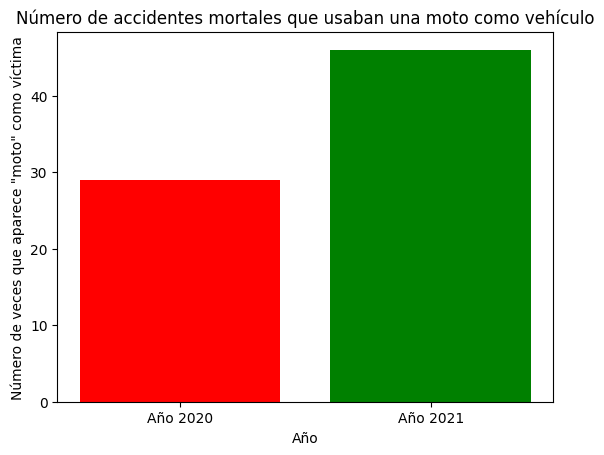

In [44]:
año_anterior = df_victimas[df_victimas['año'] == 2020]
año_actual = df_victimas[df_victimas['año'] == 2021]

conteo_año_anterior = año_anterior['victima'].str.contains('MOTO', case=False).sum()
conteo_año_actual = año_actual['victima'].str.contains('MOTO', case=False).sum()


porcentaje_cambio = ((conteo_año_actual - conteo_año_anterior) / conteo_año_anterior) * 100
print('El total de accidentes en moto en el año anterior fue de: ', conteo_año_anterior)
print('El total de accidentes en moto en el año actual fue de: ',conteo_año_actual)
print('El porcentaje de accidentes del presente año respecto al año anterior es de:', porcentaje_cambio, '%')

plt.bar(['Año 2020', 'Año 2021'], [conteo_año_anterior, conteo_año_actual], color=['red','green'])
plt.xlabel('Año')
plt.ylabel('Número de veces que aparece "moto" como víctima')
plt.title('Número de accidentes mortales que usaban una moto como vehículo')
plt.show()


Con la grafica anterior podemos evaluar el cumplimiento o no de nuestro KPI, en este caso se buscaba una reducción en los accidentes en donde las victimas fueran motocicletas en un 7%, lamentablemente no se consiguió lograr este KPI, en cambio los accidentes aumentaron. Teniendo en cuenta que en el año 2020 tuvimos un total de 29 accidentes en donde la victima conducía una motocicleta y si lo comparamos con el año 2021 en donde el total de victimas fue de 46, lamentablemente tuvimos un aumentos del 58.62% <br> <br>
Recomendaciones: Como recomendaciones para poder alcanzar este KPI, sugerimos el que sea obligatorio el uso de equipo de seguridad en todas aquellas personas que manejan motocicletas como lo son los cascos, chamarras de protección entre otras, así como capsulas de conciencia vial a todas las personas que vayan a tramitar sus próximas licencias para conducir, sin importar el tipo de vehículo que manejen.

In [45]:
df_victimas[(df_victimas['victima'] == 'MOTO') & (df_victimas['año']== 2021)].count()

id_hecho               46
fecha                  46
año                    46
mes                    46
rol                    46
victima                46
sexo                   46
edad                   46
fecha_fallecimiento    46
rango_etario           46
semestre               46
dtype: int64

3. Reducir en un 5% las muertes en las personas con un rango etario de 21 a 30 años en los ultimos dos años.

In [46]:
df_victimas['edad'] = df_victimas['edad'].astype(int)

Frecuencia de victimas de edades entre 21 y 30 años para el año 2020: 17
Frecuencia de victimas de edades entre 21 y 30 años para el año 2021: 23
El porcentaje de cambio entre el año 2020 y 2021 es de: 35.294117647058826 %


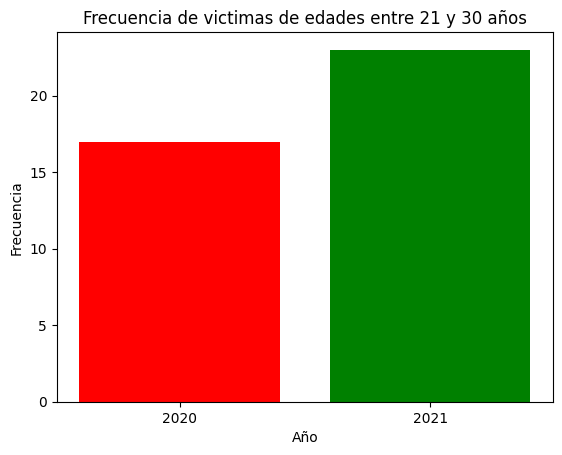

In [47]:
edades_año_anterior = df_victimas[(df_victimas['año'] == 2020) & (df_victimas['edad'] >= 21) & (df_victimas['edad'] <= 30)]
edades_año_actual = df_victimas[(df_victimas['año'] == 2021) & (df_victimas['edad'] >= 21) & (df_victimas['edad'] <= 30)]


frecuencia_anio_anterior = edades_año_anterior.shape[0]
frecuencia_anio_actual = edades_año_actual.shape[0]


porcentaje_cambio = ((frecuencia_anio_actual - frecuencia_anio_anterior) / frecuencia_anio_anterior) * 100
print("Frecuencia de victimas de edades entre 21 y 30 años para el año 2020:", frecuencia_anio_anterior)
print("Frecuencia de victimas de edades entre 21 y 30 años para el año 2021:", frecuencia_anio_actual)
print("El porcentaje de cambio entre el año 2020 y 2021 es de:", porcentaje_cambio, "%")

años = ['2020', '2021']
frecuencias = [frecuencia_anio_anterior, frecuencia_anio_actual]

# Graficar las frecuencias
plt.bar(años, frecuencias, color=['red', 'green'])
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de victimas de edades entre 21 y 30 años')
plt.show()

En este tercer KPI lo que buscábamos era poder tener una reducción del 5% entre las personas que tuvieran entre 21 y 30 años comparando el 2021 con el 2020, lamentablemente no conseguimos esa disminución del 5%, al contrario. Hubo un aumento del 35.29%

In [48]:
df_hechos.to_csv('df_hechos.csv')
df_victimas.to_csv('df_victimas.csv')